In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import linalg, sparse
from scipy.sparse.linalg import eigsh
from scipy.constants import hbar

In [2]:
#Insert Actual Quantities Here
alpha = 10
N = 10
m_r = 1.44*10**(-25)
dims = 2*N + 1
k_l_r = 2 * np.pi / 829
hbar_real = hbar
#What we use in lattice
m = 1
hbar_scaled = 1
k_l = 1

<>:30: SyntaxWarning: invalid escape sequence '\h'
<>:30: SyntaxWarning: invalid escape sequence '\h'
C:\Users\sanvi\AppData\Local\Temp\ipykernel_25560\3625825440.py:30: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('q Value ($\hbar k$)')


[[ -1.03816575   1.24796537   4.59285499 ... 180.50435849 180.54337819
  220.53904445]
 [ -1.03817579   1.24805079   4.58917007 ... 180.31345885 180.73435928
  220.32805929]
 [ -1.03820588   1.24830702   4.57881034 ... 180.12266023 180.92544142
  220.11717516]
 ...
 [ -1.03820588   1.24830702   4.57881034 ... 180.12266023 180.92544142
  220.11717516]
 [ -1.03817579   1.24805079   4.58917007 ... 180.31345885 180.73435928
  220.32805929]
 [ -1.03816575   1.24796537   4.59285499 ... 180.50435849 180.54337819
  220.53904445]]


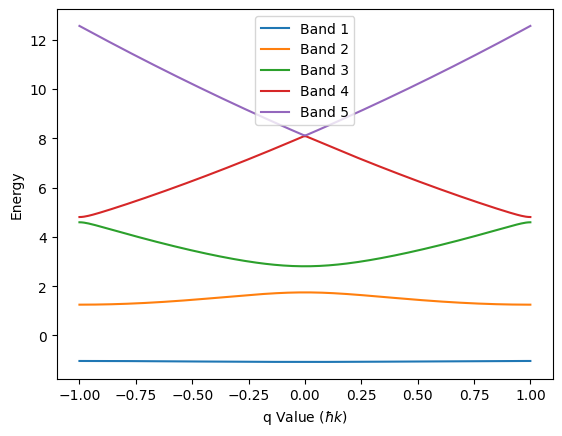

In [3]:
#Building a function which can solve the equation
def H_builder(alpha, N, q, hbar_scaled, k_l, m):
    E_r = (hbar_scaled**2)*(k_l**2)/(2*m)
    V_0 = alpha*E_r
    main_diag = np.zeros(dims)
    for i in range(-N, N+1):
        main_diag[i+N] = (((2*i+q)/hbar_scaled*k_l)**2*E_r)
    offset_diag = np.full(dims-1, V_0/4)
    H = np.zeros((dims,dims), dtype= float)
    np.fill_diagonal(H, main_diag)
    np.fill_diagonal(H[1:], offset_diag)
    np.fill_diagonal(H[:,1:], offset_diag)
    return H, main_diag, offset_diag

q_vals = np.linspace(-hbar_scaled*k_l, hbar_scaled*k_l, 200)
energy_bands = np.zeros((len(q_vals), 2*N+1))

for i, q in enumerate(q_vals):
    H, main_diag, offset_diag = H_builder(alpha, N, q, hbar_scaled, k_l, m)
    eigenvalues = sp.linalg.eigh_tridiagonal(main_diag, offset_diag)[0]
    energy_bands[i, :] = eigenvalues  

print(energy_bands)
#Plotting the energy bands
lines = []
for band in range(5):
    line, = plt.plot(q_vals, energy_bands[:, band], label=f'Band {band + 1}')
    lines.append(line)

plt.xlabel('q Value ($\hbar k$)')
plt.ylabel('Energy')

# Create a custom legend showing band labels with their respective colors
plt.legend(handles=lines, labels=[f'Band {i+1}' for i, line in enumerate(lines)])

plt.show()
